In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM tron''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,TRON,TRX,2017-09-14 23:59:59,0.002479,0.001298,0.002006,0.001427,58769.699219,0.0
1,2,TRON,TRX,2017-09-15 23:59:59,0.001831,0.001091,0.001419,0.001801,26474.800781,0.0
2,3,TRON,TRX,2017-09-16 23:59:59,0.017671,0.001371,0.001815,0.001831,54534.699219,0.0
3,4,TRON,TRX,2017-09-17 23:59:59,0.003879,0.001781,0.001836,0.003320,124998.000000,0.0
4,5,TRON,TRX,2017-09-18 23:59:59,0.003438,0.002534,0.003324,0.003263,159158.000000,0.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1392 non-null   object 
 1   Symbol      1392 non-null   object 
 2   Date        1392 non-null   object 
 3   High        1392 non-null   float64
 4   Low         1392 non-null   float64
 5   Open        1392 non-null   float64
 6   Close       1392 non-null   float64
 7   Volume      1392 non-null   float64
 8   Marketcap   1392 non-null   float64
 9   Range       1392 non-null   float64
 10  Difference  1392 non-null   float64
dtypes: float64(8), object(3)
memory usage: 119.8+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1392 non-null   object        
 1   Symbol      1392 non-null   object        
 2   Date        1392 non-null   datetime64[ns]
 3   High        1392 non-null   float64       
 4   Low         1392 non-null   float64       
 5   Open        1392 non-null   float64       
 6   Close       1392 non-null   float64       
 7   Volume      1392 non-null   float64       
 8   Marketcap   1392 non-null   float64       
 9   Range       1392 non-null   float64       
 10  Difference  1392 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 119.8+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1392.000000,1392.000000,1392.000000,1392.000000,1.392000e+03,1.392000e+03,1392.000000,1392.000000
mean,0.034403,0.030652,0.032553,0.032585,9.459435e+08,2.224104e+09,0.003751,0.000032
std,0.030277,0.024737,0.027625,0.027562,1.240489e+09,1.932420e+09,0.007806,0.005200
min,0.001831,0.001091,0.001419,0.001427,2.647480e+04,0.000000e+00,0.000116,-0.053202
25%,0.017335,0.016197,0.016795,0.016804,1.975095e+08,1.120512e+09,0.000738,-0.000679
50%,0.025453,0.023790,0.024581,0.024627,6.496156e+08,1.656501e+09,0.001534,0.000003
75%,0.038529,0.033849,0.036366,0.036416,1.242293e+09,2.431134e+09,0.003645,0.000673
max,0.300363,0.176712,0.224499,0.220555,1.397316e+10,1.450109e+10,0.123651,0.113054


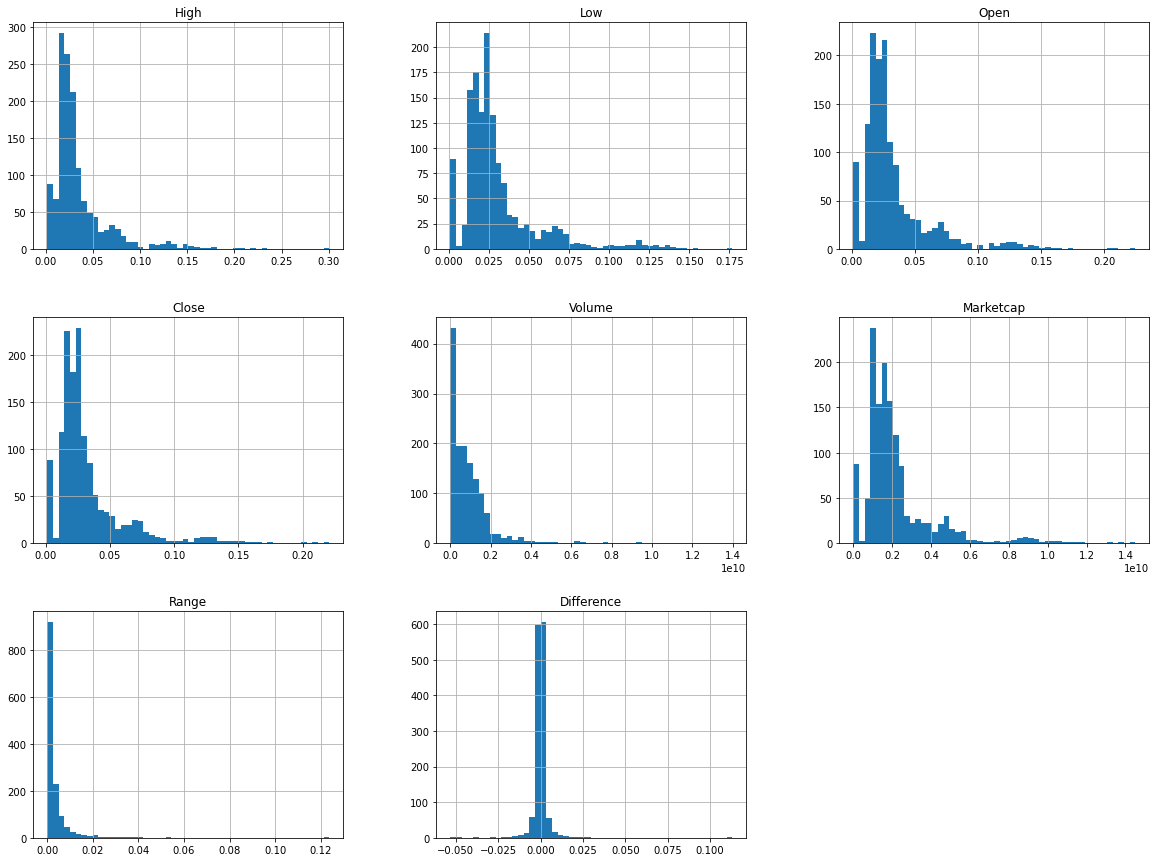

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,116,114,1343,117,119,124,1336,122,1334,101
Date,2018-01-08 23:59:59,2018-01-06 23:59:59,2021-05-19 23:59:59,2018-01-09 23:59:59,2018-01-11 23:59:59,2018-01-16 23:59:59,2021-05-12 23:59:59,2018-01-14 23:59:59,2021-05-10 23:59:59,2017-12-24 23:59:59
Difference,-0.053202,-0.049702,-0.037163,-0.029383,-0.021747,-0.021557,-0.020196,-0.017852,-0.015765,-0.015264


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,112,1298,1329,110,1294,115,1309,125,93,1307
Date,2018-01-04 23:59:59,2021-04-04 23:59:59,2021-05-05 23:59:59,2018-01-02 23:59:59,2021-03-31 23:59:59,2018-01-07 23:59:59,2021-04-15 23:59:59,2018-01-17 23:59:59,2017-12-16 23:59:59,2021-04-13 23:59:59
Difference,0.113054,0.027272,0.027171,0.026611,0.026224,0.025977,0.024118,0.021827,0.017866,0.017584


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

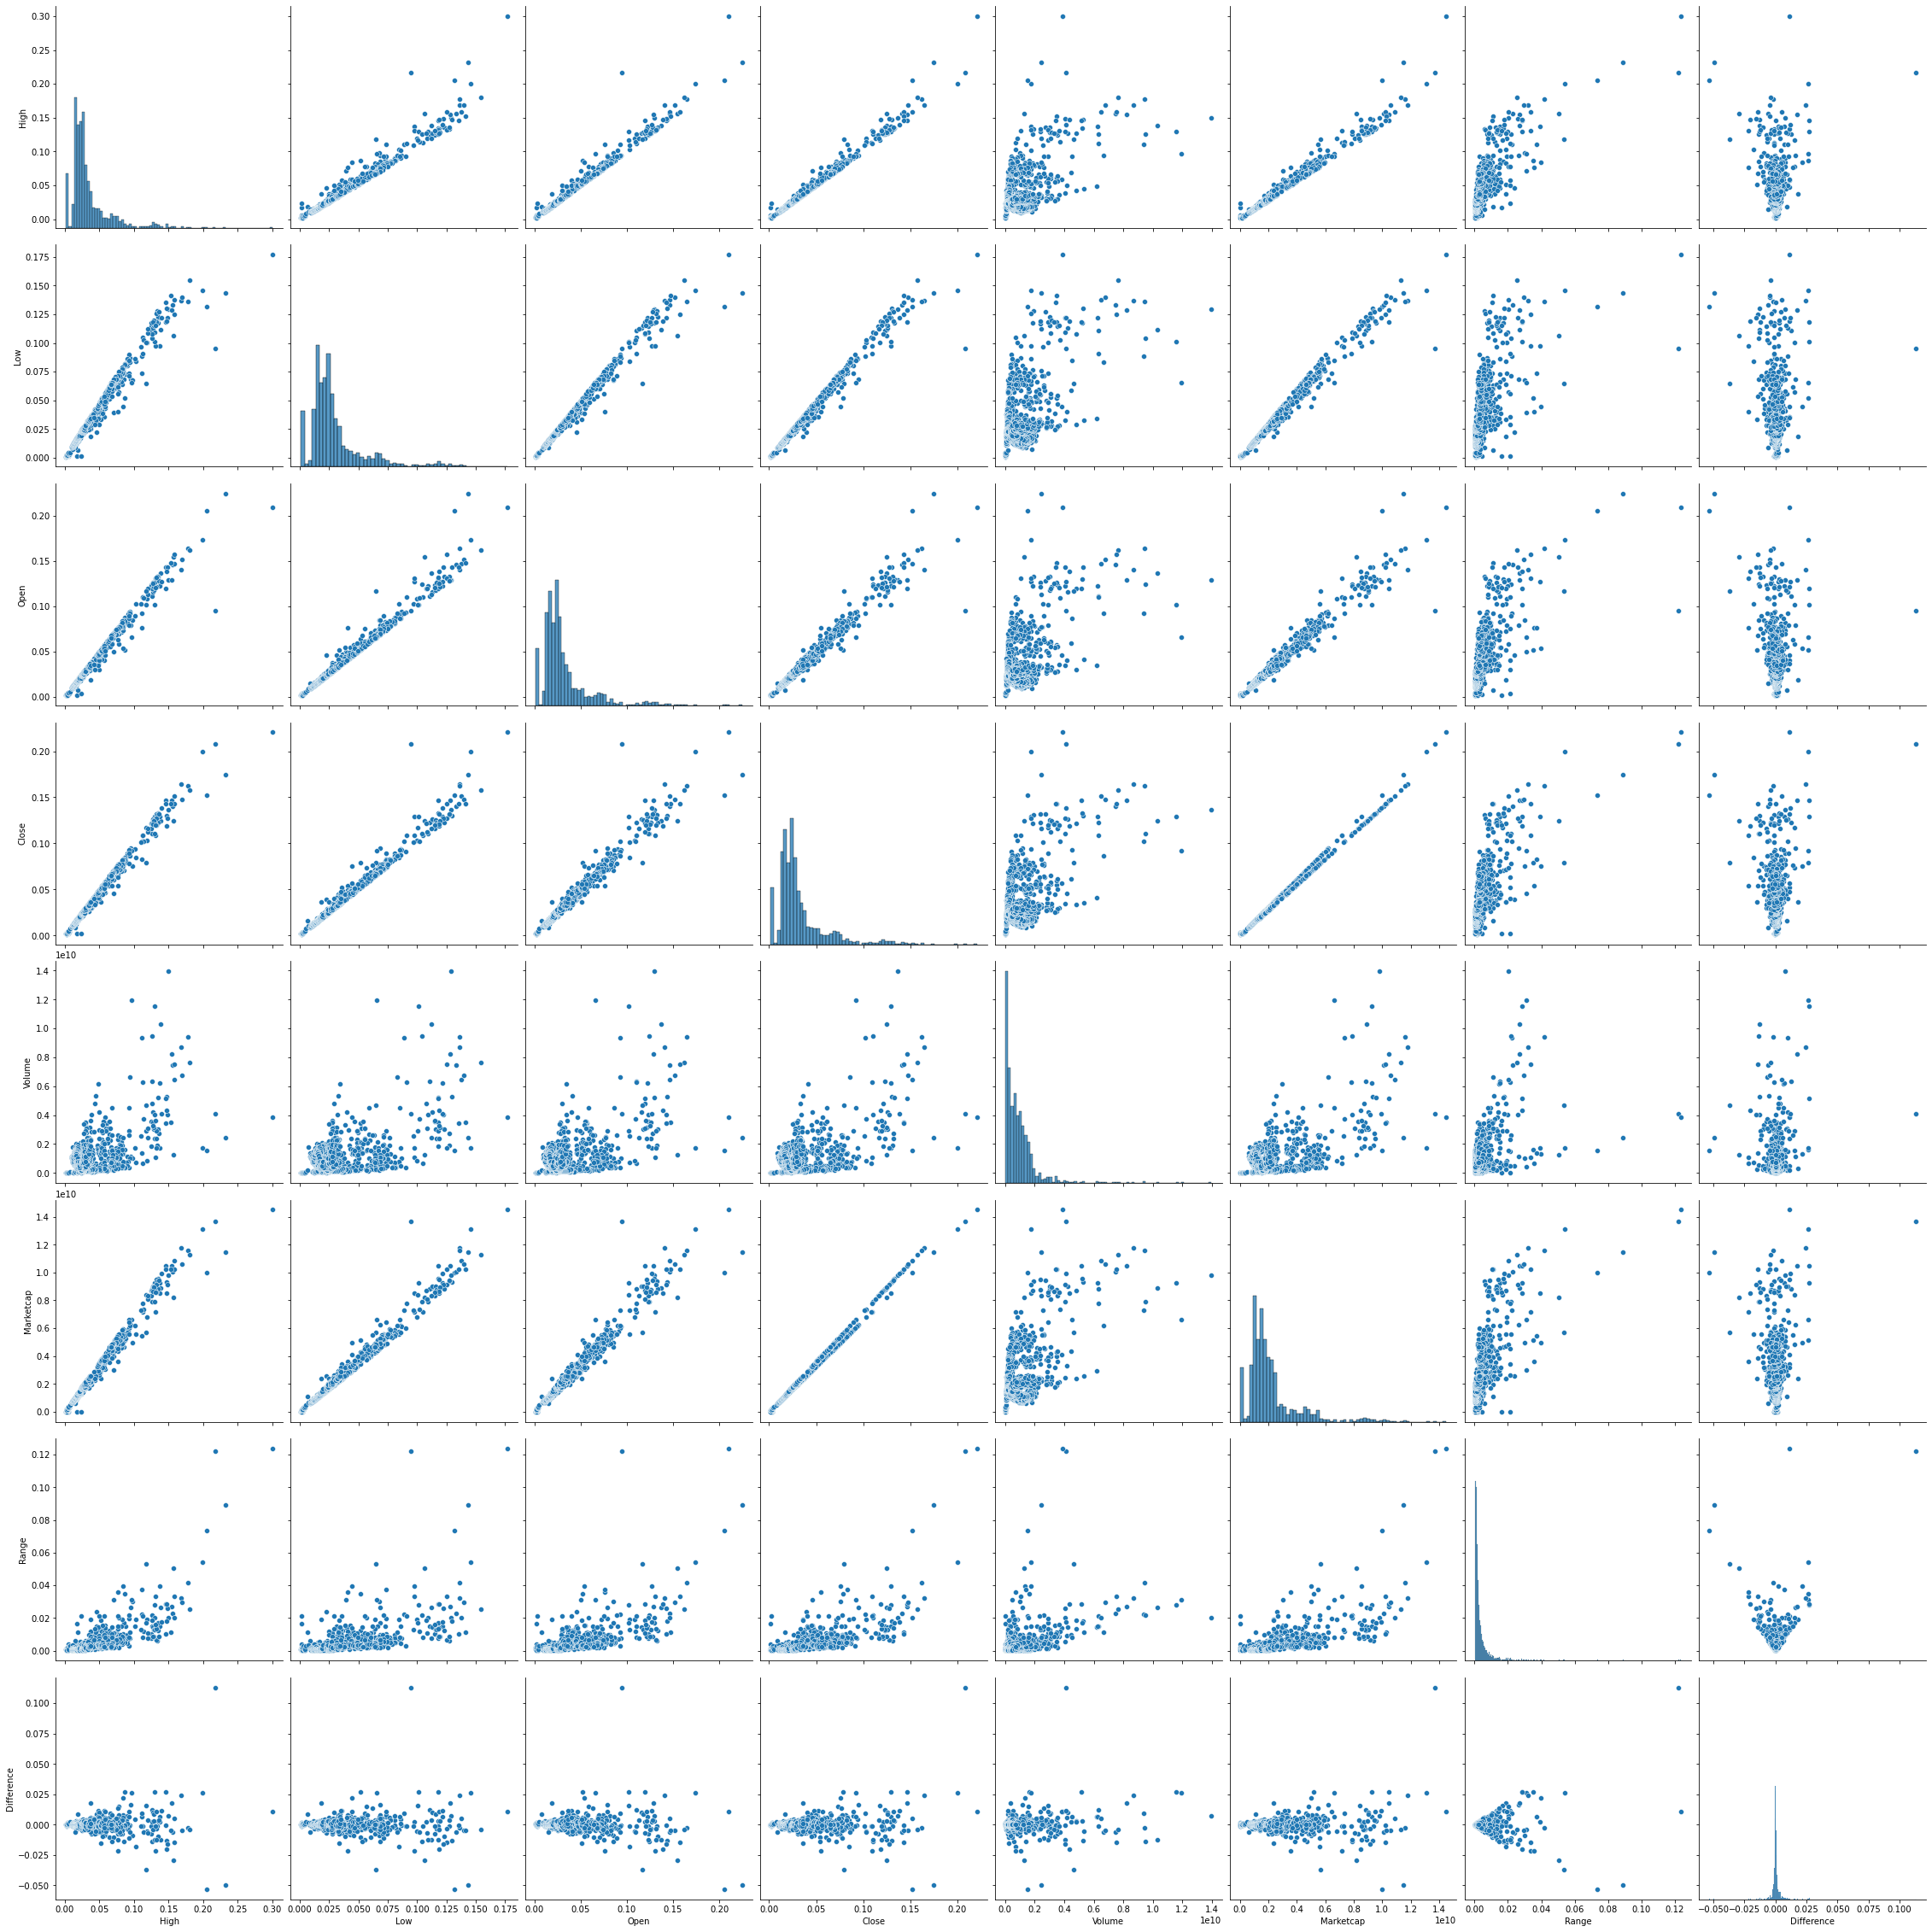

In [15]:
sns.pairplot(data,height=4);
